In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme(style="white", palette=None,rc={'figure.figsize':(11.7,8.27)})
import warnings
warnings.filterwarnings('ignore')

## Import Data


In [4]:
data=pd.read_csv('retail_sales_dataset.csv')
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
data.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [7]:
data.sample(3)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
295,296,2023-09-06,CUST296,Female,22,Clothing,4,300,1200
658,659,2023-03-19,CUST659,Female,39,Electronics,1,30,30
112,113,2023-09-13,CUST113,Female,41,Electronics,2,25,50


In [8]:
data.columns.to_list()

['Transaction ID',
 'Date',
 'Customer ID',
 'Gender',
 'Age',
 'Product Category',
 'Quantity',
 'Price per Unit',
 'Total Amount']

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [10]:
data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [14]:
data_Grp=data.groupby("Transaction ID")[["Age","Quantity","Price per Unit","Total Amount"]].max().reset_index()

In [16]:
data_Grp.head()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
0,1,34,3,50,150
1,2,26,2,500,1000
2,3,50,1,30,30
3,4,37,1,500,500
4,5,30,2,50,100


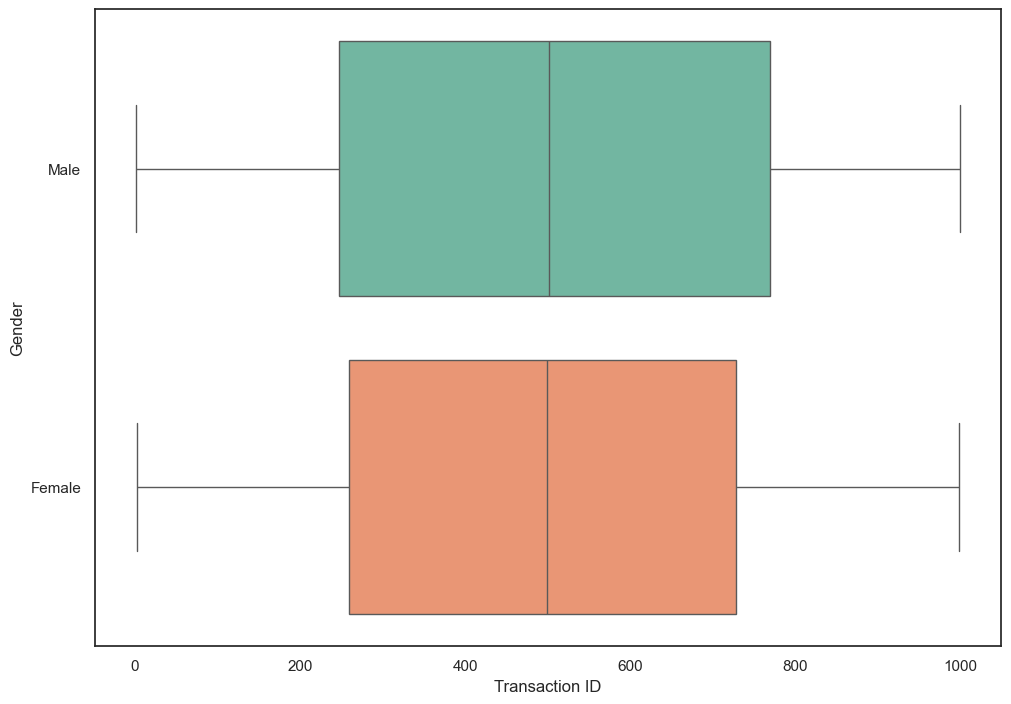

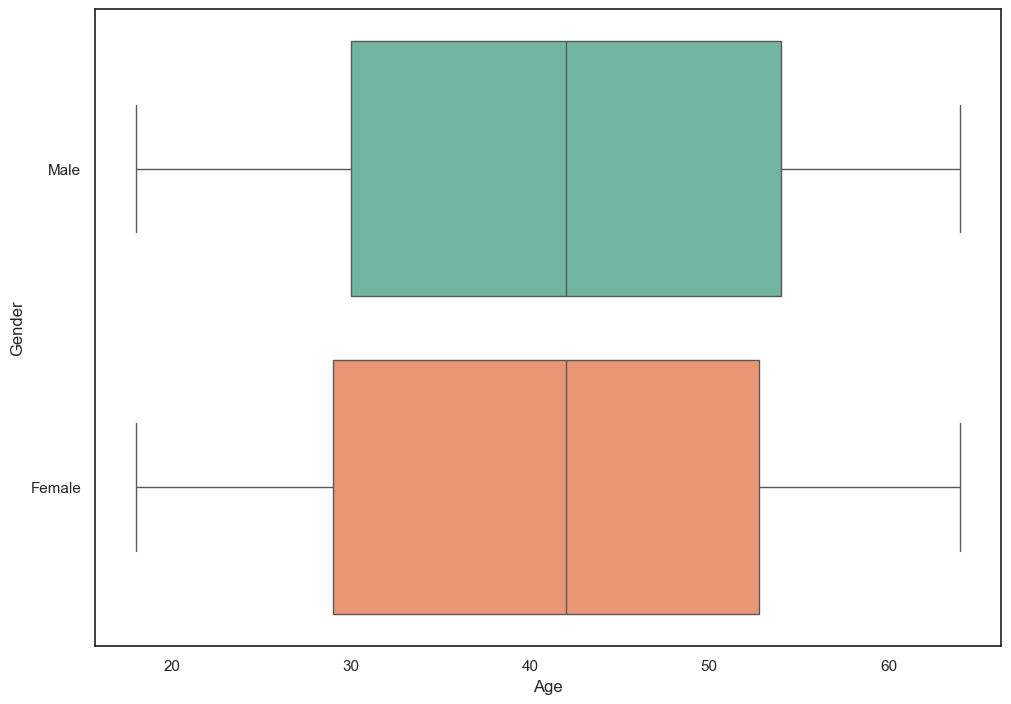

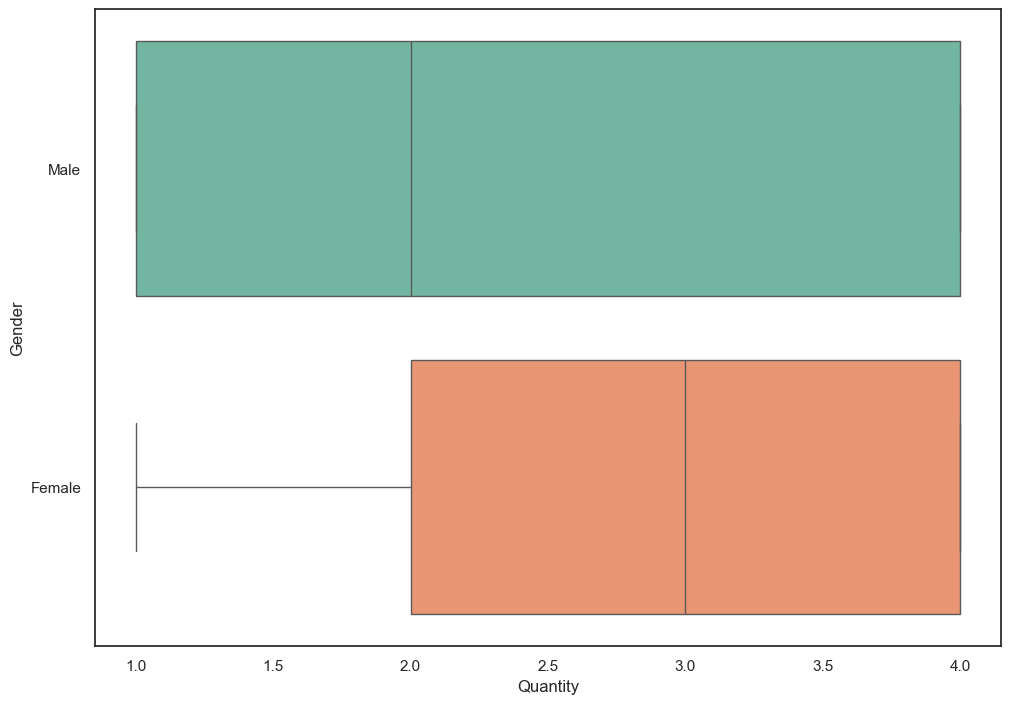

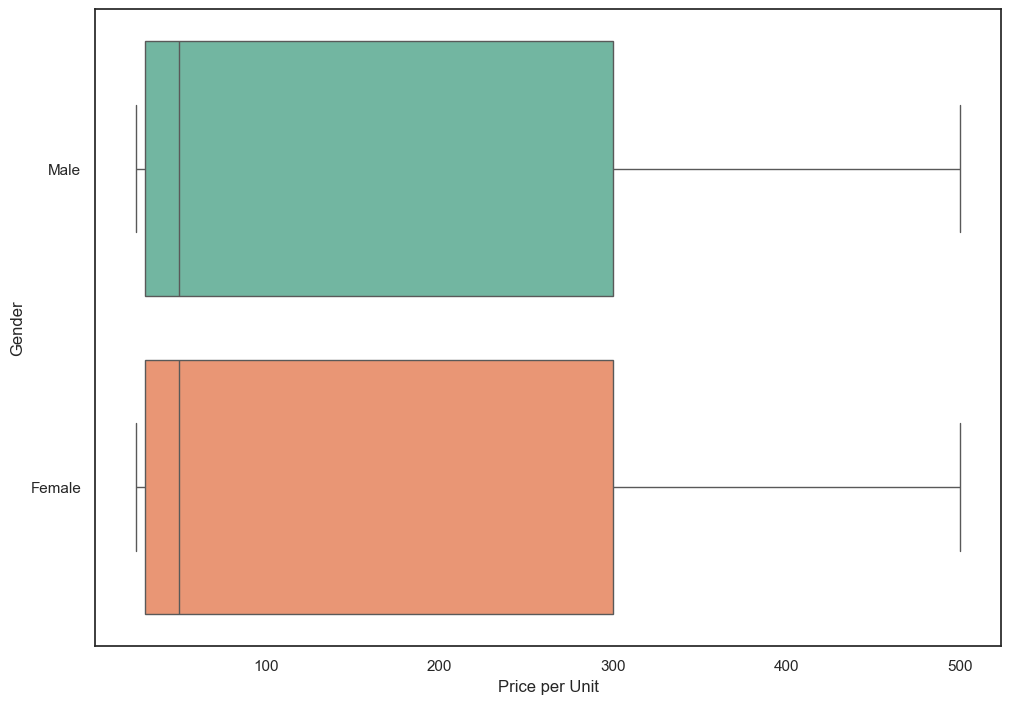

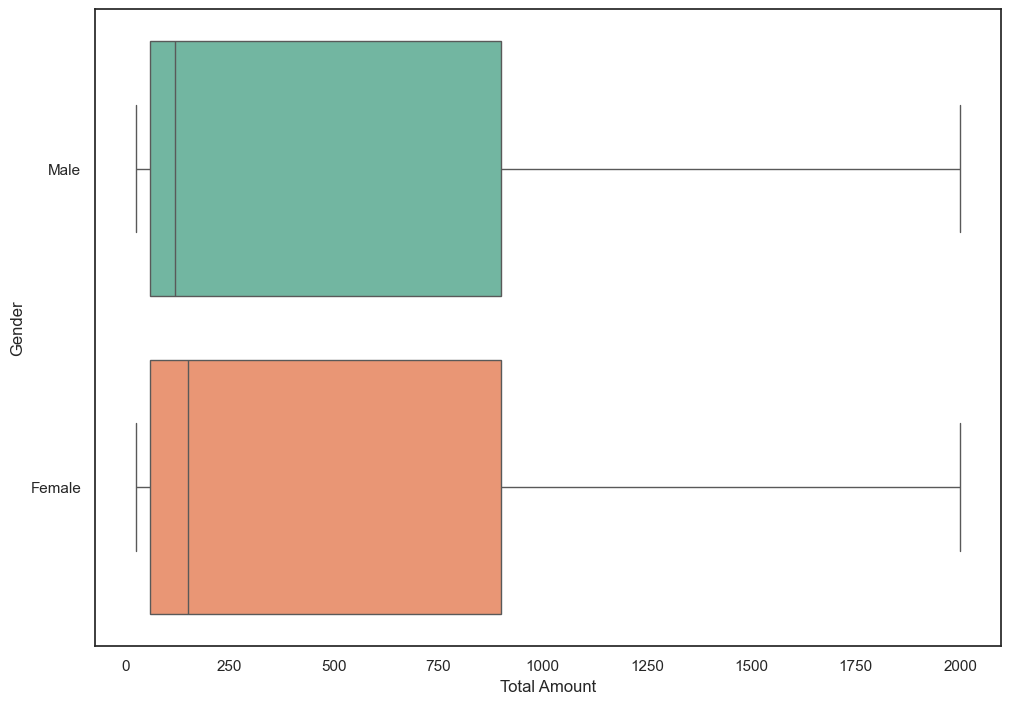

In [18]:
for i in data_Grp.columns:
    sns.boxplot(data,x=data_grp[i],y="Gender",palette="Set2")
    plt.show()

In [19]:
data.describe(include="object")

,Date,Customer ID,Gender,Product Category
count,1000,1000,1000,1000
unique,345,1000,2,3
top,2023-05-16,CUST1000,Female,Clothing
freq,11,1,510,351


In [20]:
data.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

## Product types and bestsellers

In [21]:
produ_data=data['Product Category'].value_counts()
produ_data

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

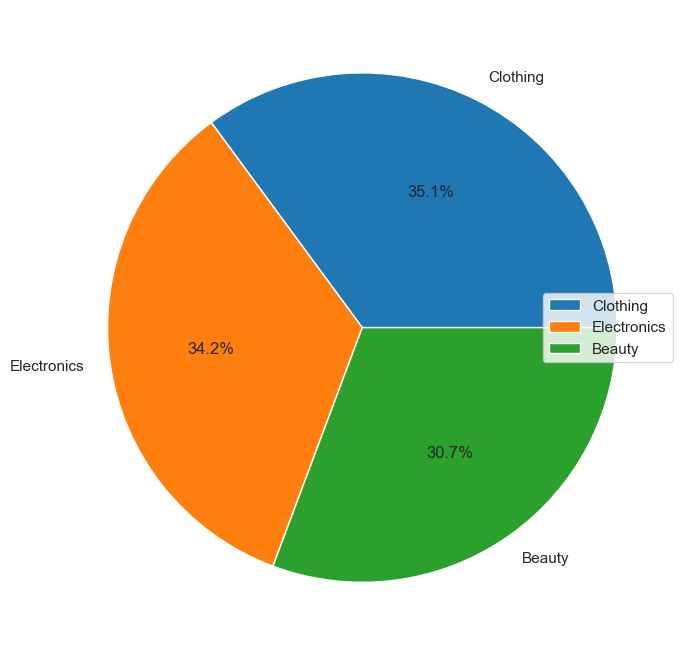

In [26]:
plt.pie(produ_data.values,labels=produ_data.index,autopct="%1.1f%%")
plt.legend(loc="center right")
plt.show()

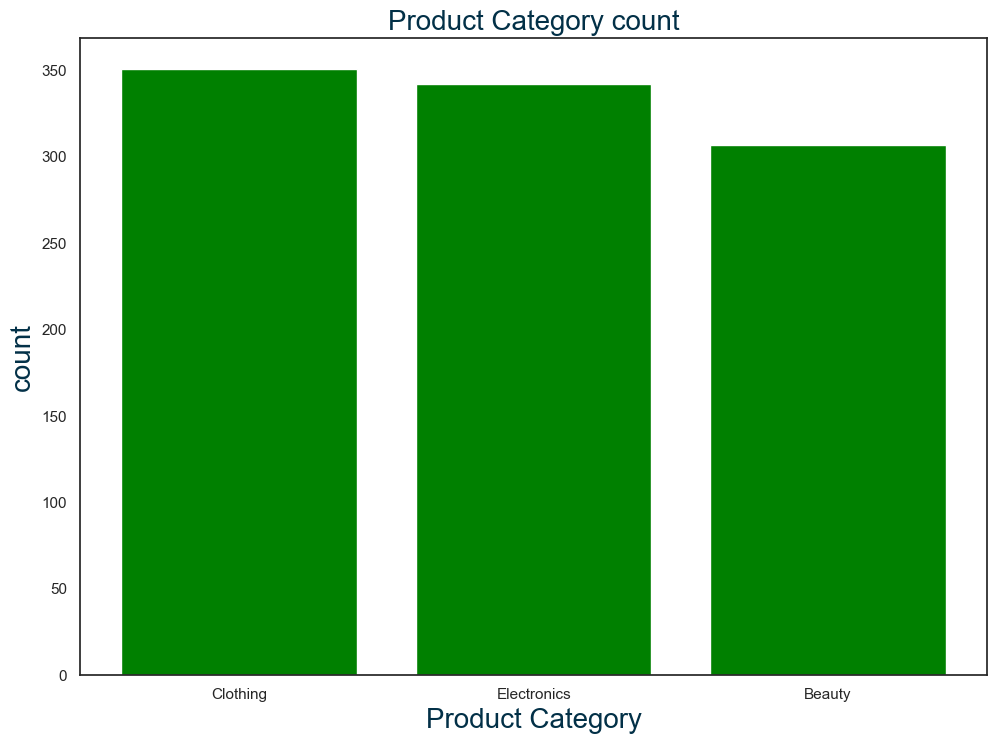

In [33]:
plt.bar(produ_data.index,produ_data.values,color='g')
plt.title("Product Category count",fontsize=20,color="#023047")
plt.xlabel("Product Category",fontsize=20,color="#023047")
plt.ylabel("count",fontsize=20,color="#023047")
plt.show()

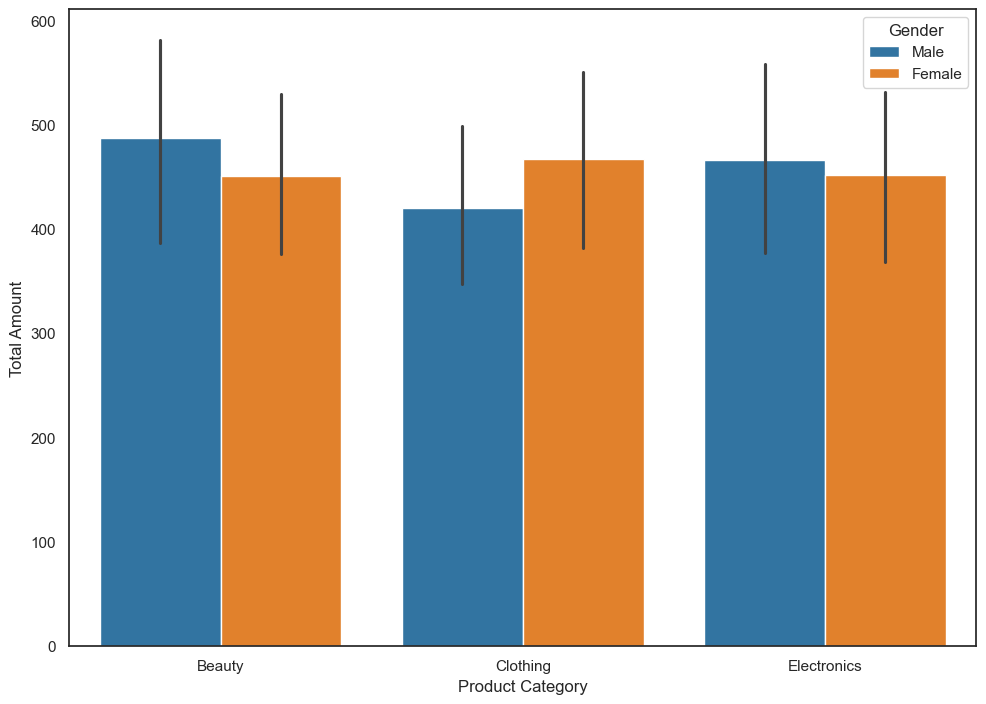

In [35]:
sns.barplot(data=data,x=data['Product Category'],y=data['Total Amount'],hue="Gender")
plt.show()

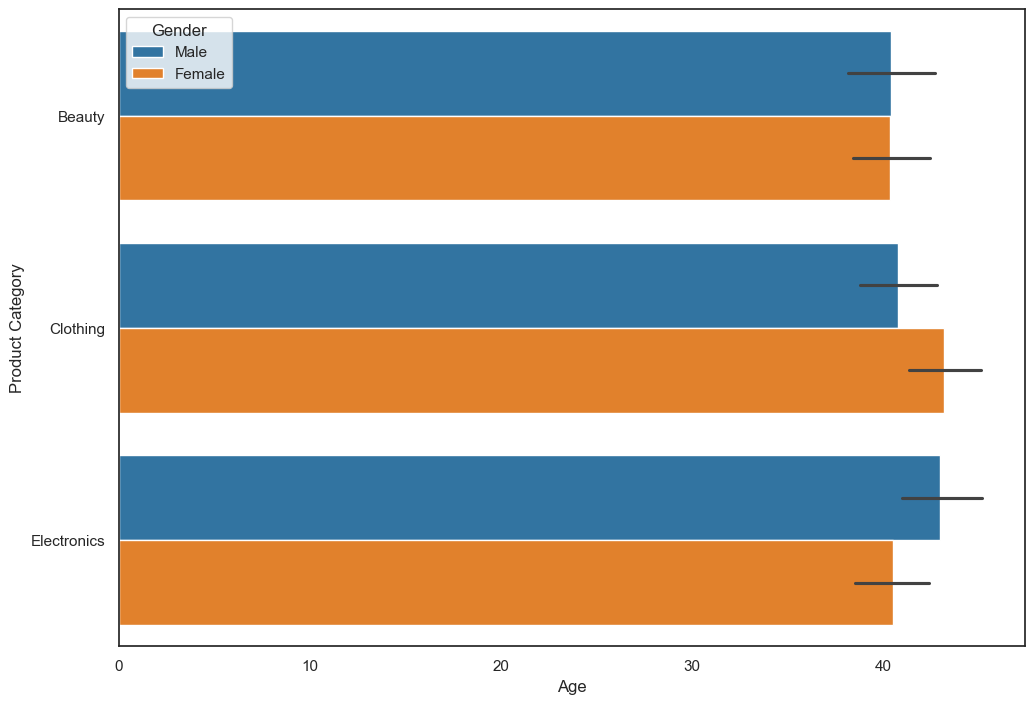

In [36]:
sns.barplot(data=data,y=data['Product Category'],x=data['Age'],hue="Gender")
plt.show()

In [37]:
data["Quantity"].value_counts()

Quantity
4    263
1    253
2    243
3    241
Name: count, dtype: int64

In [39]:
data["Price per Unit"].value_counts()

Price per Unit
50     211
25     210
500    199
300    197
30     183
Name: count, dtype: int64

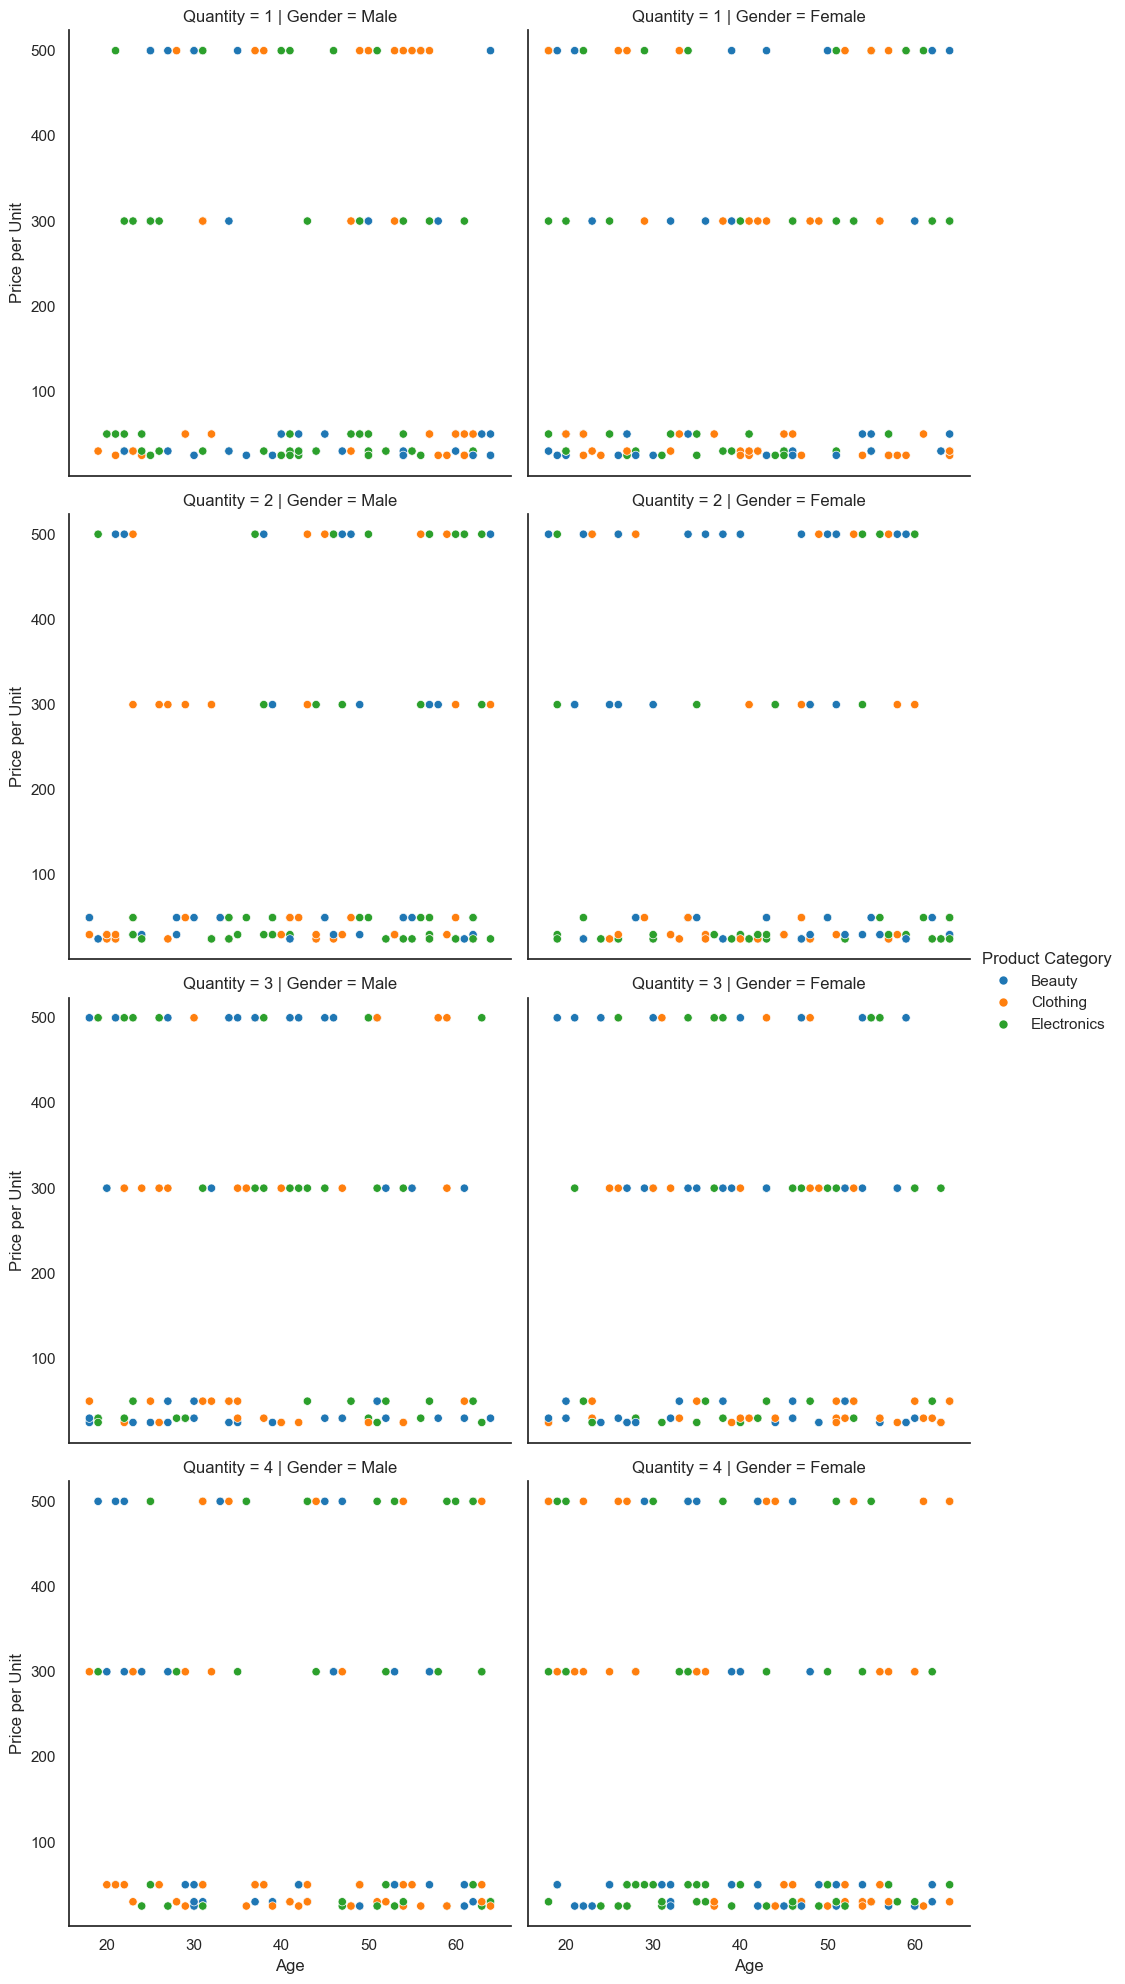

In [41]:
sns.relplot(data=data,y=data['Price per Unit'],x=data['Age'],hue="Product Category",row="Quantity",col="Gender",kind='scatter')

In [43]:
data["Date"]=pd.to_datetime(data["Date"])
data["year"]=data["Date"].dt.year
data["months"]=data["Date"].dt.month_name()
data["year"].value_counts()

year
2023    998
2024      2
Name: count, dtype: int64

In [44]:
data_y=data.groupby("year")[["months"]].max().reset_index()
data_y.head()

,year,months
0,2023,September
1,2024,January


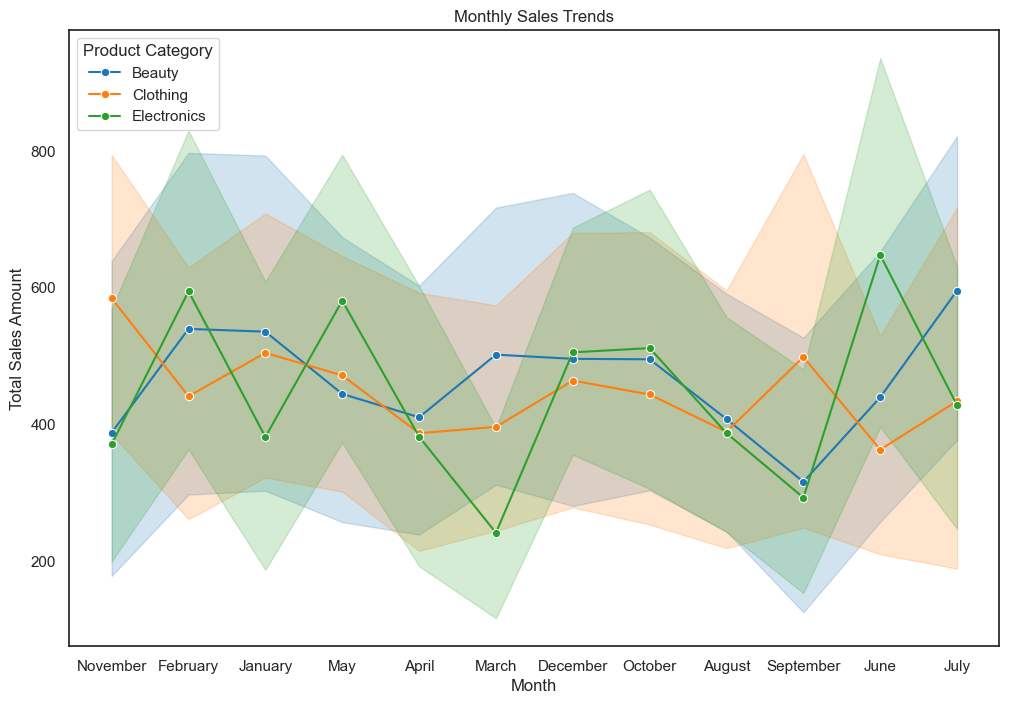

In [46]:
data['Date']=pd.to_datetime(data['Date'])
plt.figure(figsize=(12,8))
sns.lineplot(data=data,x=data['months'],y=data['Total Amount'],hue=data['Product Category'],marker="o")
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.show()

## Highest sales and Highest Price


In [47]:
filt_Data=data[(data['Price per Unit']==data['Price per Unit'].max())&(data['Quantity']==data['Quantity'].max())].reset_index()
filt_Data

,index,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,year,months
0,14,15,2023-01-16,CUST015,Female,42,Electronics,4,500,2000,2023,January
1,64,65,2023-12-05,CUST065,Male,51,Electronics,4,500,2000,2023,December
2,71,72,2023-05-23,CUST072,Female,20,Electronics,4,500,2000,2023,May
3,73,74,2023-11-22,CUST074,Female,18,Beauty,4,500,2000,2023,November
4,88,89,2023-10-01,CUST089,Female,55,Electronics,4,500,2000,2023,October
5,92,93,2023-07-14,CUST093,Female,35,Beauty,4,500,2000,2023,July
6,108,109,2023-10-18,CUST109,Female,34,Electronics,4,500,2000,2023,October
7,117,118,2023-05-16,CUST118,Female,30,Electronics,4,500,2000,2023,May
8,123,124,2023-10-27,CUST124,Male,33,Clothing,4,500,2000,2023,October
9,138,139,2023-12-15,CUST139,Male,36,Beauty,4,500,2000,2023,December


In [48]:
filt_Data=filt_Data.sort_values(by='Date',ascending=True)
filt_Data

,index,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,year,months
0,14,15,2023-01-16,CUST015,Female,42,Electronics,4,500,2000,2023,January
40,742,743,2023-01-16,CUST743,Female,34,Beauty,4,500,2000,2023,January
39,741,742,2023-01-21,CUST742,Female,38,Electronics,4,500,2000,2023,January
21,419,420,2023-01-23,CUST420,Female,22,Clothing,4,500,2000,2023,January
31,591,592,2023-01-24,CUST592,Female,46,Beauty,4,500,2000,2023,January
16,268,269,2023-02-01,CUST269,Male,25,Clothing,4,500,2000,2023,February
30,576,577,2023-02-13,CUST577,Male,21,Beauty,4,500,2000,2023,February
20,415,416,2023-02-17,CUST416,Male,53,Electronics,4,500,2000,2023,February
15,256,257,2023-02-19,CUST257,Male,19,Beauty,4,500,2000,2023,February
10,151,152,2023-02-28,CUST152,Male,43,Electronics,4,500,2000,2023,February


In [49]:
filt_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 0 to 35
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             49 non-null     int64         
 1   Transaction ID    49 non-null     int64         
 2   Date              49 non-null     datetime64[ns]
 3   Customer ID       49 non-null     object        
 4   Gender            49 non-null     object        
 5   Age               49 non-null     int64         
 6   Product Category  49 non-null     object        
 7   Quantity          49 non-null     int64         
 8   Price per Unit    49 non-null     int64         
 9   Total Amount      49 non-null     int64         
 10  year              49 non-null     int32         
 11  months            49 non-null     object        
dtypes: datetime64[ns](1), int32(1), int64(6), object(4)
memory usage: 4.8+ KB


In [51]:
filt_Data.describe()

,index,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount,year
count,49.000000,49.000000,49,49.000000,49.0,49.0,49.0,49.0
mean,458.387755,459.387755,2023-07-01 02:26:56.326530560,39.734694,4.0,500.0,2000.0,2023.0
min,14.000000,15.000000,2023-01-16 00:00:00,18.000000,4.0,500.0,2000.0,2023.0
25%,156.000000,157.000000,2023-04-02 00:00:00,29.000000,4.0,500.0,2000.0,2023.0
50%,479.000000,480.000000,2023-06-29 00:00:00,38.000000,4.0,500.0,2000.0,2023.0
75%,699.000000,700.000000,2023-10-01 00:00:00,51.000000,4.0,500.0,2000.0,2023.0
max,969.000000,970.000000,2023-12-28 00:00:00,64.000000,4.0,500.0,2000.0,2023.0
std,282.163208,282.163208,NaN,14.251865,0.0,0.0,0.0,0.0


In [52]:
filt_Data.describe(include="object")

,Customer ID,Gender,Product Category,months
count,49,49,49,49
unique,49,2,3,12
top,CUST015,Male,Electronics,May
freq,1,25,19,8


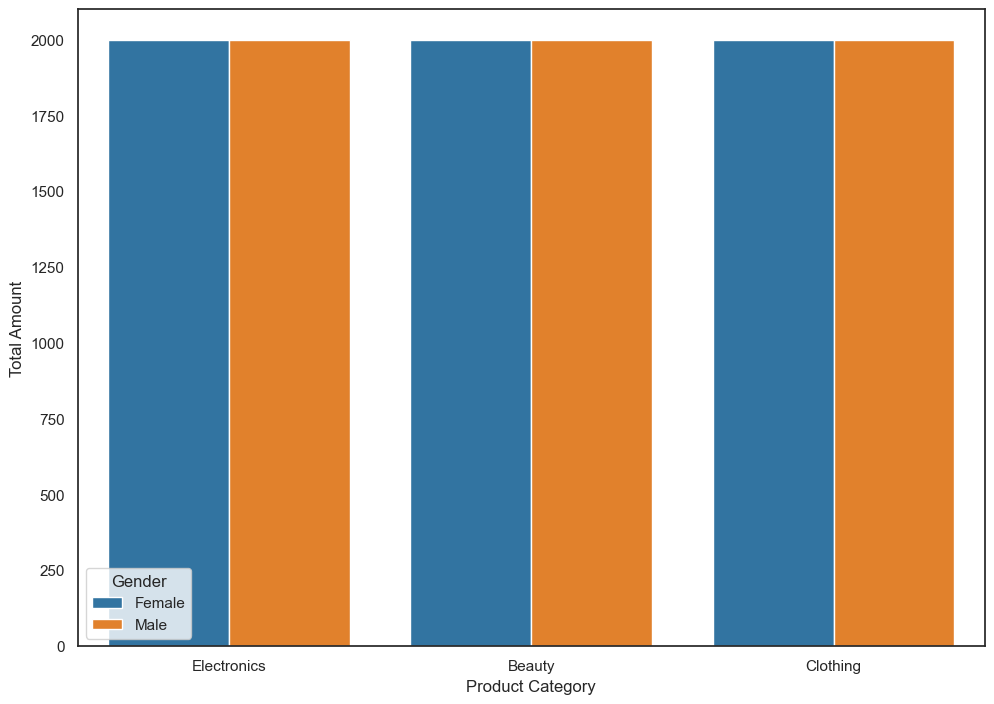

In [53]:
sns.barplot(data=filt_Data,x=filt_Data['Product Category'],y=filt_Data['Total Amount'],hue="Gender")
plt.show()

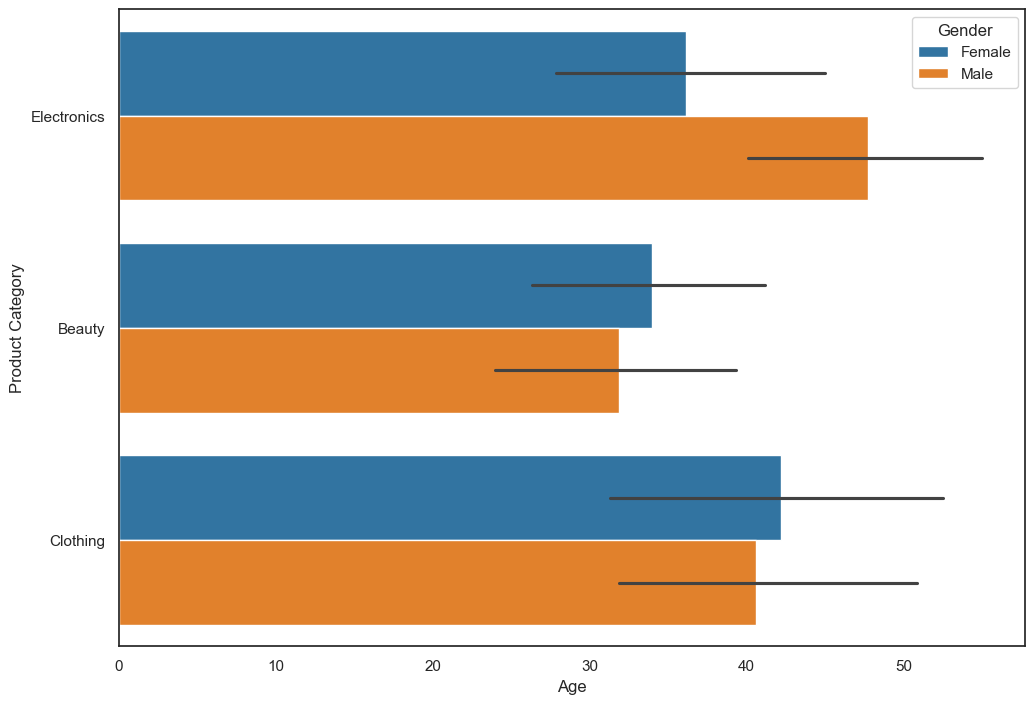

In [54]:
sns.barplot(data=filt_Data,y=filt_Data['Product Category'],x=filt_Data['Age'],hue="Gender")
plt.show()

In [56]:
prod_Data=filt_Data['Product Category'].value_counts()
prod_Data

Product Category
Electronics    19
Clothing       17
Beauty         13
Name: count, dtype: int64

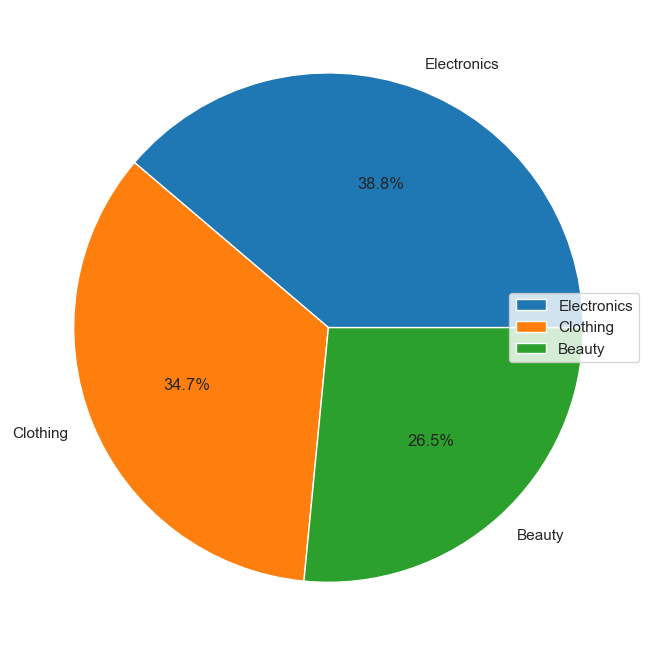

In [58]:
plt.pie(prod_Data.values,labels=prod_Data.index,autopct="%1.1f%%")
plt.legend(loc="center right")
plt.show()

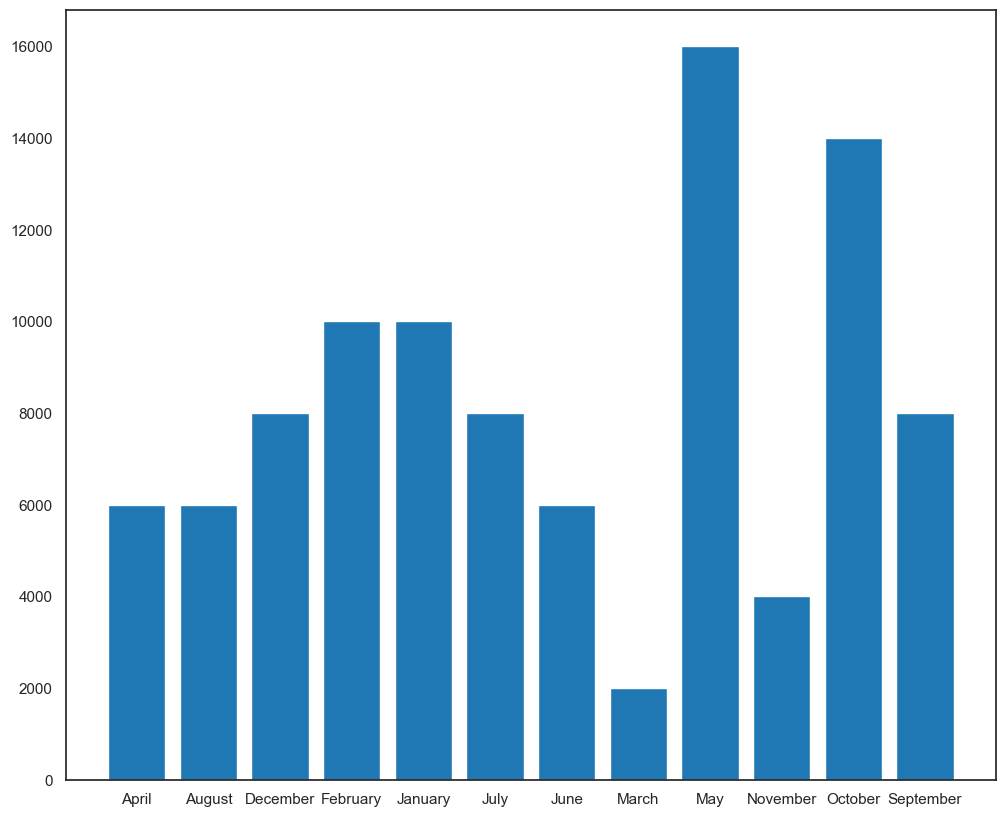

In [60]:
plt.figure(figsize=(12,10))
plt.bar(filt_Data.groupby('months')['Total Amount'].sum().index,filt_Data.groupby('months')['Total Amount'].sum())
plt.show()